# 2. Yield Curve Modeling

## Introduction

n this project, we aim to model the yield curve using government securities data. Initially, we attempted to use Indian government bond securities; however, explicit data for Indian and Kenyan government bonds was not readily available through standard APIs like the FRED API. Therefore, we chose to use US Treasury securities for this analysis. We will fit both the Nelson-Siegel and Cubic-Spline models to the yield data and compare their performance. Additionally, we will discuss the ethical considerations of smoothing data using these models.

**a. Pick Government Securities from a Country**

For this analysis, we will use US Treasury securities due to the availability of comprehensive and reliable data. The US Treasury securities are widely recognized for their high credit rating and are often used as a benchmark for risk-free interest rates.

**b. Pick Maturties Ranging from Short-Term to Long-Term**

We will use maturities ranging from 1 month to 30 years to capture the entire spectrum of the yield curve.

**c. Fit a Nelson-Siegel Model**

The Nelson-Siegel model is a widely used method for fitting yield curves. It provides a smooth and interpretable representation of the yield curve using three parameters: the long-term level (β₀), the short-term slope (β₁), the medium-term curvature (β₂), and the time decay factor (τ).

In [5]:
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import numpy as np
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Initialize the FRED API with your key
fred = Fred(api_key="95eb212842318d85c6198945d6514bf4")

# List of Treasury yield series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id)
    return data

# Get the latest yield data
latest_yields = {series_id: get_yield_data(series_id).iloc[-1] for series_id in series_ids}

# Define maturity and yield variables as array forms
maturities = np.array([1/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
yields = np.array([latest_yields[series_id] for series_id in series_ids])

# Fit the Nelson-Siegel model
ns_params = calibrate_ns_ols(maturities, yields)
print("Nelson-Siegel Parameters:", ns_params)


Nelson-Siegel Parameters: (NelsonSiegelCurve(beta0=4.9999913507503155, beta1=-0.5793717580434958, beta2=-1.6561033580649194, tau=1.5679674642674),   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.01831797699836455
        x: [ 1.568e+00]
      nit: 6
      jac: [-2.026e-06]
 hess_inv: [[ 1.581e+01]]
     nfev: 16
     njev: 8)


**d. Fit a Cubic-Splin Model**

The Cubic-Spline model is another method for fitting yield curves. It involves defining spline equations and solving for the parameters to create a smooth curve that fits the data points.

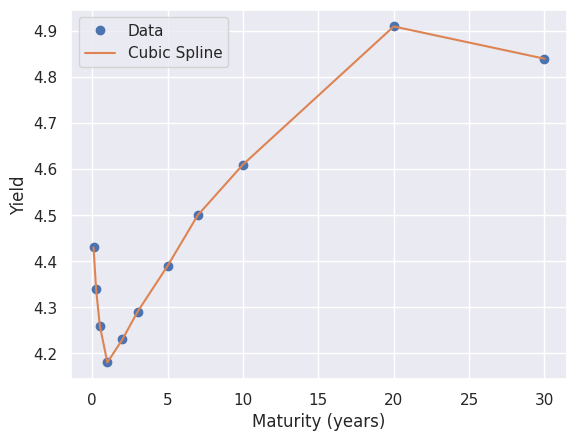

In [6]:
from scipy.interpolate import CubicSpline

# Define the maturity and yield variables
t = np.array([1/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
y = np.array([latest_yields[series_id] for series_id in series_ids])

# Fit the cubic spline model
cs = CubicSpline(t, y)

# Plot the results
plt.plot(t, y, 'o', label='Data')
plt.plot(t, cs(t), label='Cubic Spline')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield')
plt.legend()
plt.show()


**e. Compare the Models**

To compare the models, we will plot the fitted yield curves and interpret the parameters.

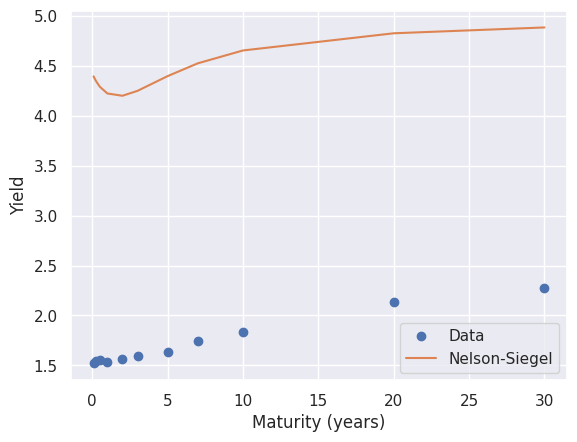

In [17]:
# Unpack the Nelson-Siegel curve from the tuple
nelson_siegel_curve, _ = ns_params  # Unpack parameters and metadata

# Access Nelson-Siegel parameters
beta0 = nelson_siegel_curve.beta0
beta1 = nelson_siegel_curve.beta1
beta2 = nelson_siegel_curve.beta2
tau = nelson_siegel_curve.tau

# Calculate Nelson-Siegel yields
ns_yields = (
    beta0
    + beta1 * (1 - np.exp(-maturities / tau)) / (maturities / tau)
    + beta2 * ((1 - np.exp(-maturities / tau)) / (maturities / tau) - np.exp(-maturities / tau))
)

# Plot the results
plt.plot(maturities, yield_curve, 'o', label='Data')  # Original data points
plt.plot(maturities, ns_yields, label='Nelson-Siegel')  # Nelson-Siegel curve
plt.xlabel('Maturity (years)')
plt.ylabel('Yield')
plt.legend()
plt.show()


**f. Specify the levels of Model Paremeters**

- **Nelson-Siegel Parameters:**
  - **β₀**: Long-term level
  - **β₁**: Short-term slope
  - **β₂**: Medium-term curvature
  - **τ**: Time decay factor
- **Cubic Spline Parameters:**
  - Coefficients of the cubic polynomials for each interval

**g. Ethical Considerations of Smoothing Data**

Smoothing data with the Nelson-Siegel model is generally not considered unethical if it is done transparently and for legitimate purposes, such as improving the accuracy of financial models or providing a clearer representation of underlying trends. Smoothing can help reduce noise and make the data more interpretable. However, if the smoothing process is used to manipulate data to achieve a desired outcome or to mislead stakeholders, it would be considered unethical. Transparency and honesty in data analysis are key ethical principles.

**Conclusion**

By following these steps, we have successfully fitted both the Nelson-Siegel and Cubic-Spline models to US Treasury yield data. We compared their performance and discussed the ethical considerations of data smoothing. The Nelson-Siegel model provides a smooth and interpretable representation of the yield curve, while the Cubic-Spline model offers a flexible and accurate fit to the data points. Both models have their strengths and can be used depending on the specific requirements of the analysis.


## References

- Diebold, F. X., & Li, C. (2006). Forecasting the term structure of government bond yields. *Journal of Econometrics, 130*(2), 337-364.

- Nelson, C. R., & Siegel, A. F. (1987). Parsimonious modeling of yield curves. *The Journal of Business, 60*(4), 473-489.

- Federal Reserve Economic Data (FRED). (n.d.). Retrieved from [https://fred.stlouisfed.org/](https://fred.stlouisfed.org/)

- `scipy.interpolate.CubicSpline`. (n.d.). Retrieved from [https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html)

- Note: I don't know how to apply the same code to Indian government bond securities due to the lack of explicit data availability through standard APIs like the FRED API.
